In [36]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [37]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [38]:
with open(dataset, newline='', encoding='utf-8-sig') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader, 1):  # conta linhas a partir de 1
        for j, cell in enumerate(row, 1):  # conta colunas a partir de 1
            if cell == '' or cell == '""':
                print(f'Célula vazia encontrada na linha {i}, coluna {j}')

In [48]:
NUM_CLASSES = 25

# Dataset reading

In [49]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [50]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(21 * 2, )),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [53]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               5504      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)               

In [54]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=300, verbose=1)

In [55]:
# Model compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [56]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback]
)

Epoch 1/1000
74/74 [==============================] - 1s 3ms/step - loss: 1.3153 - accuracy: 0.5922 - val_loss: 1.8035 - val_accuracy: 0.4013

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
74/74 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.7842 - val_loss: 1.4271 - val_accuracy: 0.4771

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
74/74 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.8218 - val_loss: 0.4581 - val_accuracy: 0.8561

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
74/74 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.8472 - val_loss: 0.3673 - val_accuracy: 0.8869

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
74/74 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8668 - val_lo

KeyboardInterrupt: 

In [57]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

25/25 [==============================] - 0s 522us/step - loss: 0.0804 - accuracy: 0.9793


In [58]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [59]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.9656483e-10 1.1501390e-09 4.5038610e-07 2.3086768e-05 6.0222419e-07
 2.1606175e-07 1.2316382e-09 3.4197608e-08 1.2930021e-10 9.9993372e-01
 3.6073214e-07 3.0414979e-09 1.7436639e-08 1.0255571e-09 2.3024617e-08
 3.4903060e-05 1.5984546e-10 2.3639857e-06 2.6637162e-10 9.2664860e-12
 1.2935525e-06 6.8771824e-09 9.3640073e-09 2.8275294e-06 6.7006825e-14]
9


# Confusion matrix

In [60]:
pip install pandas==1.1.5

Note: you may need to restart the kernel to use updated packages.


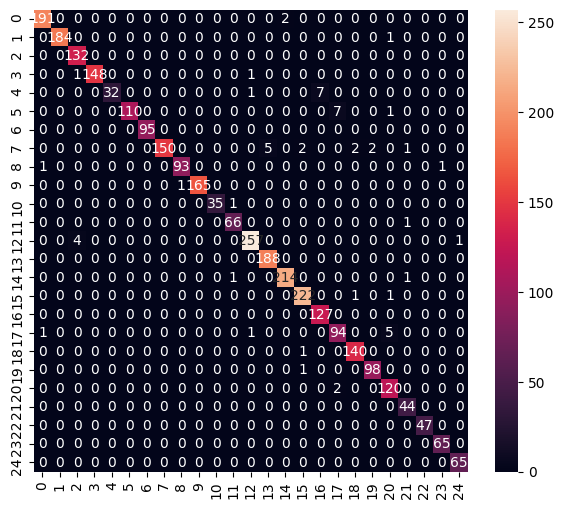

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       193
           1       1.00      0.99      1.00       185
           2       0.96      1.00      0.98       132
           3       1.00      0.99      0.99       150
           4       1.00      0.80      0.89        40
           5       1.00      0.93      0.96       118
           6       1.00      1.00      1.00        95
           7       1.00      0.93      0.96       162
           8       0.99      0.98      0.98        95
           9       1.00      0.99      1.00       166
          10       1.00      0.97      0.99        36
          11       0.97      0.99      0.98        67
          12       0.99      0.98      0.98       262
          13       0.97      1.00      0.99       188
          14       0.99      0.99      0.99       216
          15       0.98      0.99      0.99       224
          16       0.95      1.00      0.97       127
     

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [62]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [63]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\JAIRON~1\AppData\Local\Temp\tmp91irilqc\assets


INFO:tensorflow:Assets written to: C:\Users\JAIRON~1\AppData\Local\Temp\tmp91irilqc\assets


24304

# Inference test

In [64]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [65]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [66]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [67]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [68]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.54840207e-10 1.39087508e-09 5.29819431e-07 2.13832591e-05
 6.33583738e-07 2.23702557e-07 1.07395315e-09 3.45949189e-08
 1.37902439e-10 9.99935865e-01 3.62519700e-07 3.15042437e-09
 1.73180528e-08 1.04707387e-09 2.64423061e-08 3.47937603e-05
 1.24783281e-10 2.00533441e-06 2.92326718e-10 1.00686985e-11
 1.21924904e-06 7.03534520e-09 1.11273346e-08 2.76117953e-06
 7.50325027e-14]
9
